<a href="https://colab.research.google.com/github/Nataliya2401/DS_11/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Linear Regression

$$h(x) = w_0 + w_1*x$$

In [2]:
# напишіть функцію гіпотези лінійної регресії у векторному вигляді;
#  h(x)= w ⋅ x (де x, w - вектори)

def h(X, w):
  return X @ w

In [3]:
# створіть функцію для обчислення функції втрат у векторному вигляді;
def loss_function(X, y, w):
  m = X.shape[0]
  J = np.sum((h(X, w) - y)**2) / (2 * m)
  return J


In [4]:
# differencials for w_0 and w_i:
def gradient_w (w, X, y):
  m = X.shape[0]
  grad_w =(1 / m) * X.T @ (h(X, w) - y)
  return grad_w

In [5]:
def grad_step(w, X, y, learning_rate = 0.001):

  w = w - learning_rate * gradient_w(w, X, y)
  return w

In [6]:
def grad_descent(w, X, y, num_iter, learning_rate = 0.001, epsilon = 0.0000000001):
  X = np.concatenate((np.ones((len(X), 1)), X), axis=1)
  loss = loss_function(X, y, w)
  loss_history = [loss]
  for i in range(num_iter):
    # grads = gradient_w(w, X, y)

    w = grad_step(w, X, y, learning_rate =learning_rate)

    loss = loss_function(X, y, w)
    # print('loss', loss)

    if abs(loss - loss_history[-1]) < epsilon:

      loss_history.append(loss)
      break

    loss_history.append(loss)
    # print('tt')

  return w, loss_history


In [7]:
# знайдіть найкращі параметри w для датасету прогнозуючу ціну на будинок
# залежно від площі, кількості ванних кімнат та кількості спалень;

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing.csv')
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Normalization
$$Xi_norm = (Xi - μi)/si$$

де μi це середнє значення i-ої ознаки,
Si - діапазон значень (max−min) цієї ж ознаки,
часто замість діапазону використовують стандартне відхилення σ i


In [8]:
def normalize(data):
  mean = np.mean(data)
  diapazon = np.max(data) - np.min(data)
  result = []
  for x in data:
    x_norm = (x - mean) / diapazon
    result.append(x_norm)
  return result

In [9]:
norm = pd.DataFrame()
columns = ['price', 'area', 'bedrooms', 'bathrooms']
for column in columns:
  norm[column] = normalize(df[column])

In [10]:
norm.shape

(545, 4)

In [11]:
norm.head(5)

,price,area,bedrooms,bathrooms
0,0.738811,0.155977,0.206972,0.237920
1,0.647902,0.261818,0.206972,0.904587
2,0.647902,0.330547,0.006972,0.237920
3,0.644872,0.161475,0.206972,0.237920
4,0.575175,0.155977,0.206972,-0.095413


In [12]:
X = norm[['area', 'bedrooms', 'bathrooms']].values
y = norm['price'].values
w = np.array([0, 0, 0, 0])
num_iter = 10000000

In [13]:
w, history = grad_descent(w, X, y, num_iter, learning_rate = 0.01, epsilon = 0.000000001)
print("Коефіцієнти рівняння лінійної регресії: ", w)
len(history)

Коефіцієнти рівняння лінійної регресії:  [4.85354005e-17 4.62804406e-01 1.83331662e-01 3.59192893e-01]


15132

In [14]:
# Донавчання
w_new = np.array(w)
w_new

array([4.85354005e-17, 4.62804406e-01, 1.83331662e-01, 3.59192893e-01])

In [15]:
# w, history = grad_descent(w_new, X, y, num_iter, learning_rate = 0.001, epsilon = 0.0000000000001)
# print("Коефіцієнти рівняння лінійної регресії: ", w)
# history

### Візуалізація результатів тренування

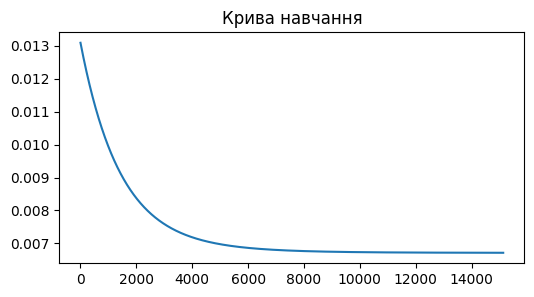

In [16]:
plt.figure(figsize=(6,3))
plt.title('Крива навчання')
plt.plot(history)
plt.show()

In [17]:
X = np.concatenate((np.ones((len(X), 1)), X), axis=1)
X

array([[ 1.        ,  0.15597654,  0.20697248,  0.23792049],
       [ 1.        ,  0.26181847,  0.20697248,  0.90458716],
       [ 1.        ,  0.33054699,  0.00697248,  0.23792049],
       ...,
       [ 1.        , -0.10519184, -0.19302752, -0.09541284],
       [ 1.        , -0.15398909,  0.00697248, -0.09541284],
       [ 1.        , -0.08938428,  0.00697248, -0.09541284]])

In [18]:
# знайдіть ці ж параметри за допомогою аналітичного рішення;
analitic_w = np.linalg.inv(X.T @ X) @ X.T @ y
analitic_w

array([1.81175091e-17, 4.77142690e-01, 1.76112569e-01, 3.60012857e-01])

In [35]:
# Порівняння
print("Коефіцієнти рівняння лінійної регресії: метод градієнтного спуску ", w)
print("Коефіцієнти рівняння лінійної регресії: аналітичний метод         ", analitic_w)
print("Різниці                                                           ", w - analitic_w)

Коефіцієнти рівняння лінійної регресії: метод градієнтного спуску  [4.85354005e-17 4.62804406e-01 1.83331662e-01 3.59192893e-01]
Коефіцієнти рівняння лінійної регресії: аналітичний метод          [1.81175091e-17 4.77142690e-01 1.76112569e-01 3.60012857e-01]
Різниці                                                            [ 3.04178915e-17 -1.43382840e-02  7.21909348e-03 -8.19963099e-04]


In [20]:
def h_lin(x, w_0, w_1, w_2, w_3):
  return w_0 + w_1*x + w_2*x + w_3*x

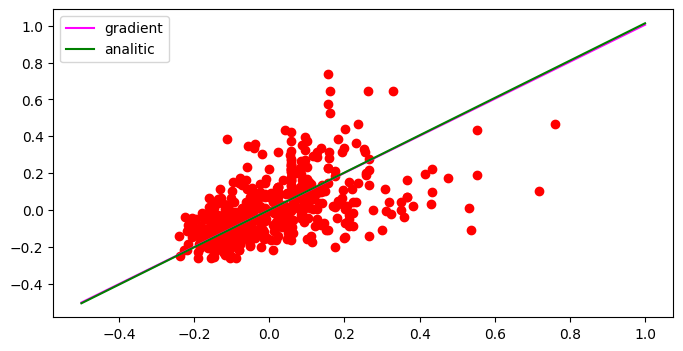

In [39]:
plt.figure(figsize=(8,4))
plt.plot(norm.area, norm.price, 'ro')
x = np.linspace(-0.5, 1, 500)
plt.plot(x, h_lin(x, w[0], w[1], w[2], w[3]), color='magenta', label='gradient')
plt.plot(x, h_lin(x, analitic_w[0], analitic_w[1], analitic_w[2], analitic_w[3]), color='green', label = 'analitic')
plt.legend()
plt.show()

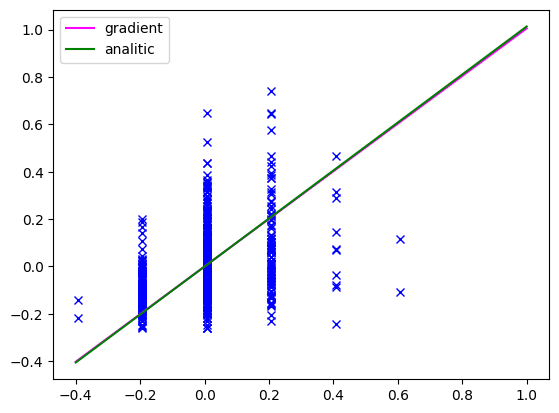

In [41]:
plt.plot(norm.bedrooms, norm.price, 'bx')
x = np.linspace(-0.4, 1, 500)
plt.plot(x, h_lin(x, w[0], w[1], w[2], w[3]), color='magenta', label='gradient')
plt.plot(x, h_lin(x, analitic_w[0], analitic_w[1], analitic_w[2], analitic_w[3]), color='green', label = 'analitic')
plt.legend()
plt.show()

## Scikit-learn Linear Regression

In [23]:
from sklearn import linear_model

In [24]:
model = linear_model.LinearRegression()

In [25]:
#  переводимо у вектор
X = np.array([norm.area, norm.bedrooms, norm.bathrooms]).T

In [26]:
X.shape

(545, 3)

In [27]:
y = np.array(norm.price)

In [28]:
y.shape

(545,)

In [29]:
model.fit(X, y)

LinearRegression()

In [30]:
model.coef_

array([0.47714269, 0.17611257, 0.36001286])

In [31]:
model.intercept_

7.014204135081996e-17

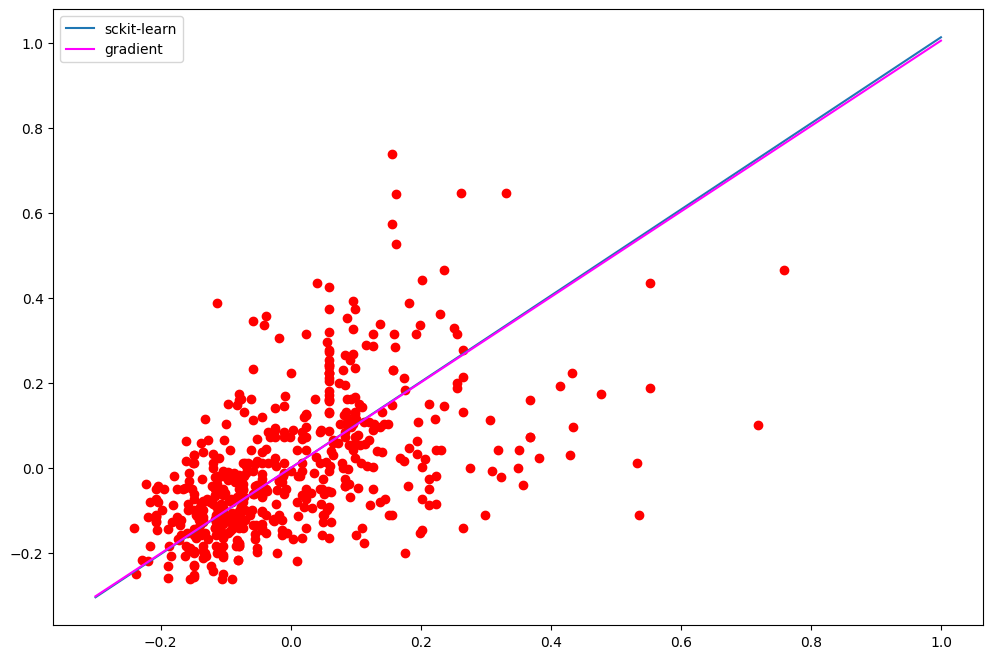

In [38]:
plt.figure(figsize=(12,8))
plt.plot(norm.area, norm.price, 'ro')
x = np.linspace(-0.3, 1, 500)
plt.plot(x, h_lin(x, model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2]), label='sckit-learn')
plt.plot(x, h_lin(x, w[0], w[1], w[2], w[3]), color='magenta', label='gradient')
plt.legend()
plt.show()

In [33]:
#